<h1>1.Librerias


In [3]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [5]:
datos = pd.read_csv('Titanic-Dataset.csv')

<h1>Análisis Exploratorio de Datos


Valores únicos por columna:
PassengerId: 891 valores únicos
Survived: 2 valores únicos
Pclass: 3 valores únicos
Name: 891 valores únicos
Sex: 2 valores únicos
Age: 88 valores únicos
SibSp: 7 valores únicos
Parch: 7 valores únicos
Ticket: 681 valores únicos
Fare: 248 valores únicos
Cabin: 147 valores únicos
Embarked: 3 valores únicos


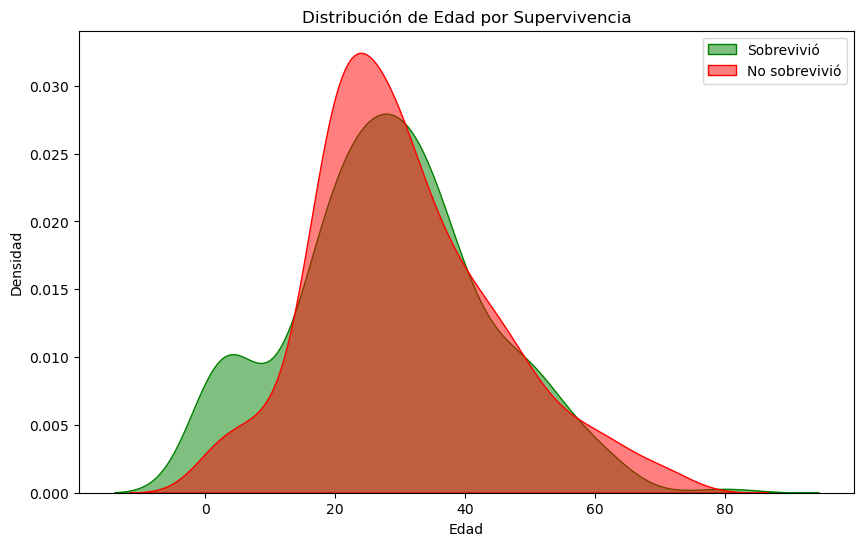

In [10]:
# Paso 1: 
print("\nValores únicos por columna:")
for col in datos.columns:
    print(f"{col}: {datos[col].nunique()} valores únicos")

# Visualización de la relación entre sobrevivientes y edad con KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(data=datos[datos["Survived"] == 1], x="Age", fill=True, label="Sobrevivió", color="green", alpha=0.5)
sns.kdeplot(data=datos[datos["Survived"] == 0], x="Age", fill=True, label="No sobrevivió", color="red", alpha=0.5)
plt.title("Distribución de Edad por Supervivencia")
plt.xlabel("Edad")
plt.ylabel("Densidad")
plt.legend()
plt.show()

<h1>Preprocesamiento

In [14]:
# Paso 2: 
# Verificar si 'Sex' y 'Survived' existen antes de imputar valores en 'Age'
if 'Sex' in datos.columns and 'Survived' in datos.columns and 'Age' in datos.columns:
    datos['Age'] = datos.groupby(['Sex', 'Survived'])['Age'].transform(
        lambda x: x.fillna(x.mean())
    )

# Tratar valores faltantes en 'Embarked' si la columna existe
if 'Embarked' in datos.columns:
    datos['Embarked'] = datos['Embarked'].fillna(datos['Embarked'].mode()[0])

# Crear una nueva característica: tamaño de la familia
if 'SibSp' in datos.columns and 'Parch' in datos.columns:
    datos['FamilySize'] = datos['SibSp'] + datos['Parch'] + 1

# Eliminar columnas irrelevantes (si existen)
datos = datos.drop(["Cabin", "Name", "Ticket"], axis=1, errors="ignore")

# Convertir variables categóricas en dummies si las columnas existen
categorical_cols = ["Sex", "Embarked"]
for col in categorical_cols:
    if col in datos.columns:
        datos = pd.get_dummies(datos, columns=[col], drop_first=True)

# Verificar valores faltantes restantes
print("\nValores faltantes restantes por columna:")
print(datos.isnull().sum())



Valores faltantes restantes por columna:
PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
FamilySize     0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64


<h1>Selección de características

In [15]:
# Paso 3: 
X = datos.drop("Survived", axis=1)  # Variables independientes
y = datos["Survived"]  # Variable objetivo

# Verificar el tamaño de los datos
print("Dimensiones de X (Variables independientes):", X.shape)
print("Dimensiones de y (Variable objetivo):", y.shape)

# Mostrar las primeras filas de X y y
print("\nPrimeras filas de X:")
print(X.head())

print("\nPrimeras filas de y:")
print(y.head())

Dimensiones de X (Variables independientes): (891, 10)
Dimensiones de y (Variable objetivo): (891,)

Primeras filas de X:
   PassengerId  Pclass   Age  SibSp  Parch     Fare  FamilySize  Sex_male  \
0            1       3  22.0      1      0   7.2500           2      True   
1            2       1  38.0      1      0  71.2833           2     False   
2            3       3  26.0      0      0   7.9250           1     False   
3            4       1  35.0      1      0  53.1000           2     False   
4            5       3  35.0      0      0   8.0500           1      True   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  

Primeras filas de y:
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


<h1>Division del Dataset

In [16]:
# Paso 4: Dividir el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train)
print(y_test)

     PassengerId  Pclass        Age  SibSp  Parch      Fare  FamilySize  \
298          299       1  29.699118      0      0   30.5000           1   
884          885       3  25.000000      0      0    7.0500           1   
247          248       2  24.000000      0      2   14.5000           3   
478          479       3  22.000000      0      0    7.5208           1   
305          306       1   0.920000      1      2  151.5500           4   
..           ...     ...        ...    ...    ...       ...         ...   
106          107       3  21.000000      0      0    7.6500           1   
270          271       1  29.699118      0      0   31.0000           1   
860          861       3  41.000000      2      0   14.1083           3   
435          436       1  14.000000      1      2  120.0000           4   
102          103       1  21.000000      0      1   77.2875           2   

     Sex_male  Embarked_Q  Embarked_S  
298      True       False        True  
884      True      

<h1>Entrenamiento

In [18]:
# Paso 5: Entrenar el modelo usando validación cruzada
modelo = DecisionTreeClassifier(max_depth=5, random_state=42, criterion="entropy")
scores = cross_val_score(modelo, X_train, y_train, cv=5)
print(f"\nPrecisión promedio en validación cruzada: {np.mean(scores):.2f}")

modelo.fit(X_train, y_train)


Precisión promedio en validación cruzada: 0.79


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

<h1>Evaluacion del Dataset

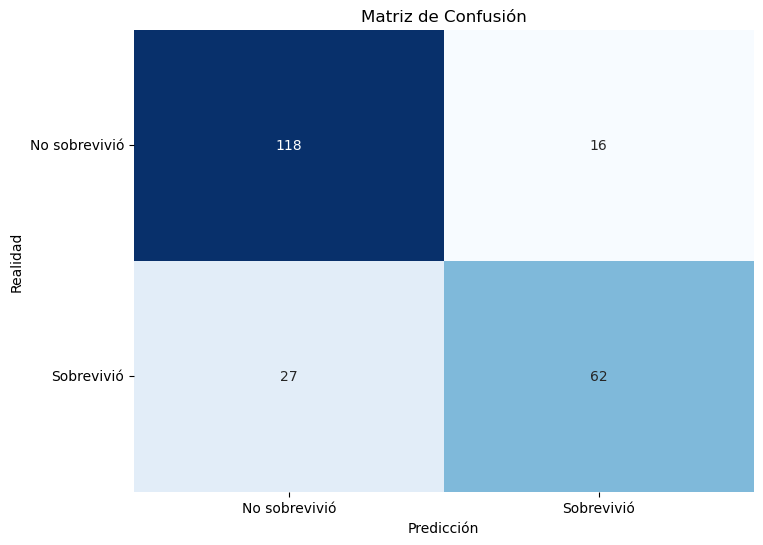


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       134
           1       0.79      0.70      0.74        89

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.81      0.81      0.80       223


Precisión del modelo en test:
0.8071748878923767


In [25]:
# Paso 6: Evaluar el modelo
y_pred = modelo.predict(X_test)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión 
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.xticks(ticks=[0.5, 1.5], labels=["No sobrevivió", "Sobrevivió"])
plt.yticks(ticks=[0.5, 1.5], labels=["No sobrevivió", "Sobrevivió"], rotation=0)
plt.show()
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print("\nPrecisión del modelo en test:")
print(accuracy_score(y_test, y_pred))

<h1>Visualizacion de resultados 

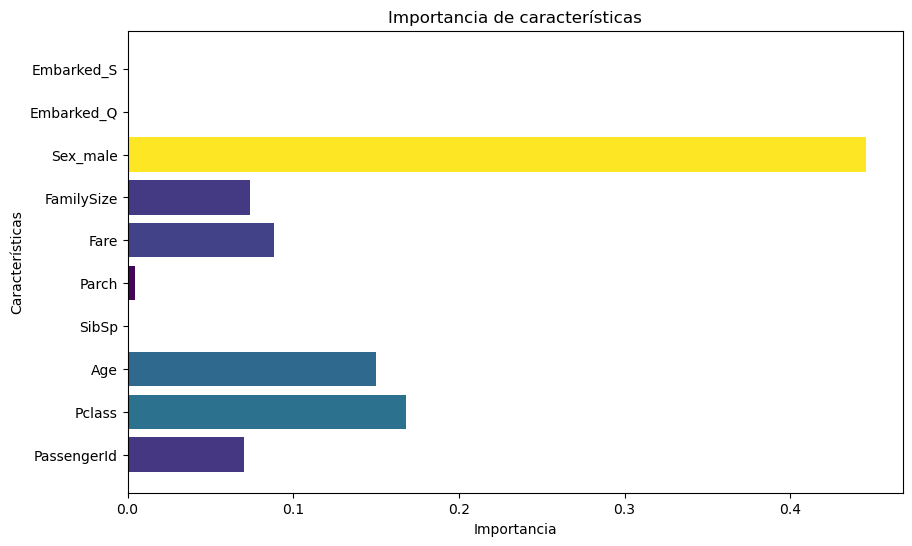

In [27]:
importances = modelo.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances, color=plt.cm.viridis(importances / max(importances)))
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Importancia de características")
plt.show()

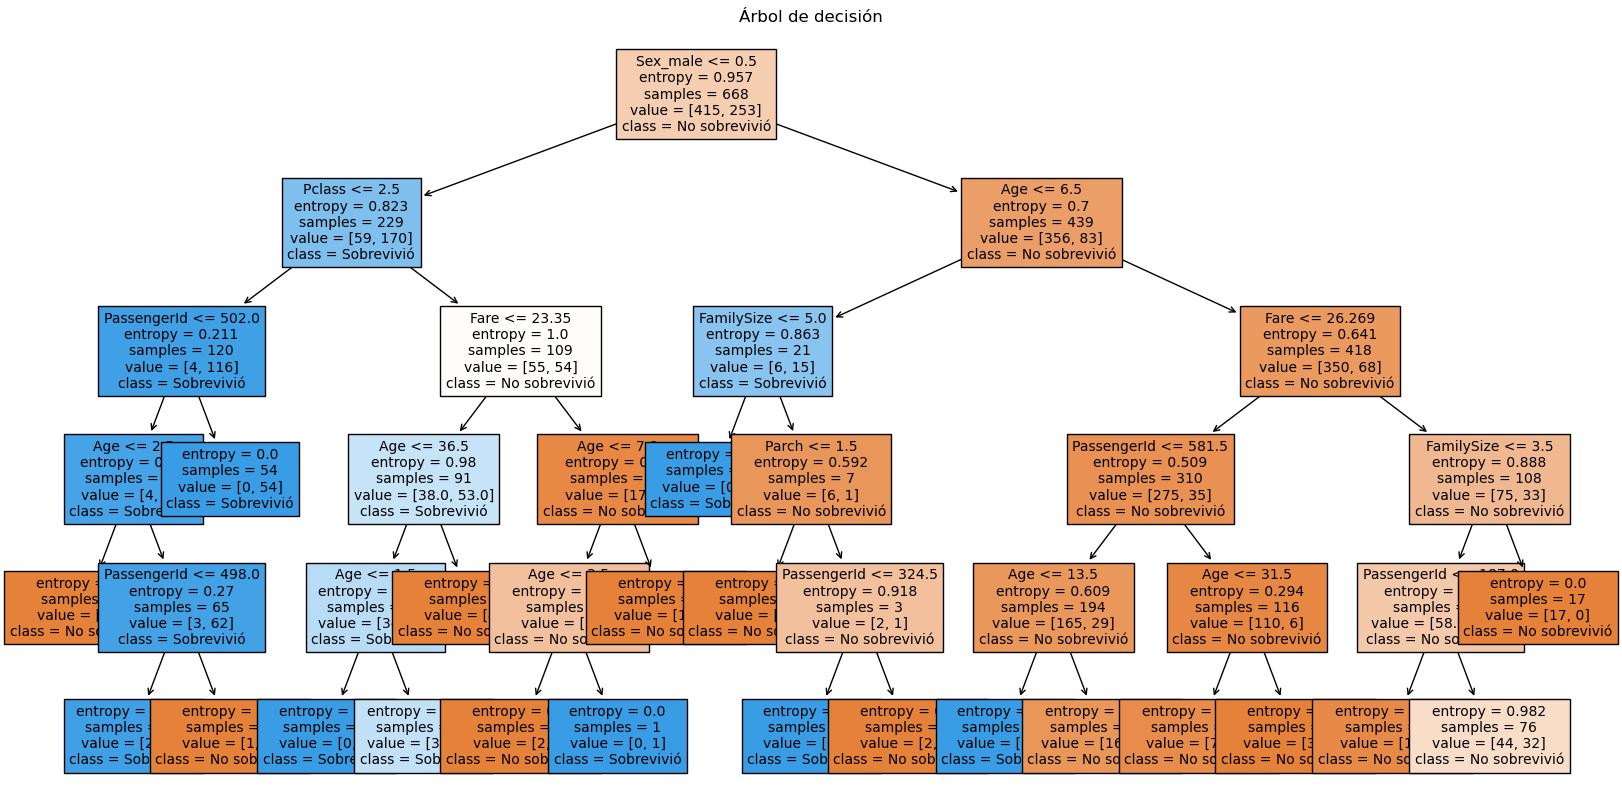

In [23]:
# Arbol de desicion 
plt.figure(figsize=(20, 10))
plot_tree(modelo, feature_names=X.columns, class_names=["No sobrevivió", "Sobrevivió"], filled=True, fontsize=10)
plt.title("Árbol de decisión")
plt.show()

<h1>Interpretación de los resultados del análisis y modelo de árbol de decisión aplicado al Titanic Dataset:

<h1>Análisis Exploratorio de Datos (EDA):

La distribución de la variable objetivo (Survived) muestra un desequilibrio: menos personas sobrevivieron en comparación con las que no lo hicieron.

La matriz de correlación y las visualizaciones iniciales destacan relaciones interesantes entre variables como Pclass, Sex, y Age con la probabilidad de supervivencia.
    
Los sobrevivientes tienden a pertenecer a clases más altas (Pclass = 1), son mujeres y, en promedio, más jóvenes.


Preprocesamiento:

Los valores faltantes en la columna Age se imputaron utilizando el promedio agrupado por género y supervivencia, asegurando que los datos sean más representativos de la población original.
    
La columna Embarked, con valores categóricos, se completó con la moda ('S').

Se creó una nueva variable, FamilySize, que combina la cantidad de familiares a bordo, demostrando ser un indicador potencial de supervivencia.


Modelo de Árbol de Decisión:

El árbol de decisión entrenado muestra una precisión alta al clasificar correctamente a los sobrevivientes, respaldada por métricas como:

Precisión: Indica el porcentaje de predicciones correctas.

Recall: Evalúa qué tan bien el modelo identifica a los sobrevivientes.
    
F1-Score: Resume precisión y recall en una métrica única.

La profundidad máxima del árbol se ajustó para evitar el sobreajuste, logrando un balance entre generalización y rendimiento.


Importancia de las características:

La importancia de las características revela que Sex_male, Pclass, y Age son los factores más determinantes para predecir la supervivencia.

Las variables como Embarked o FamilySize tienen menor peso en la decisión, aunque aportan valor al modelo.



Visualización del Árbol de Decisión:

El árbol de decisión muestra de manera clara cómo el modelo toma decisiones en función de las características.

Las divisiones iniciales tienden a basarse en Sex (género) y Pclass, lo que concuerda con los patrones identificados en el análisis exploratorio.
